IMPORTING LIBRARIES

In [47]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score, roc_curve, precision_score, recall_score,f1_score

import warnings
warnings.filterwarnings('ignore')

LOADING DATASET

In [48]:
df = pd.read_csv('/content/drive/MyDrive/projects data sets ml/creditcard.csv')

In [49]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
df.shape

(284807, 31)

In [52]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [53]:
from sklearn.preprocessing import StandardScaler

In [54]:
sc = StandardScaler()
df['Amount']=sc.fit_transform(pd.DataFrame(df['Amount']))

In [55]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [56]:
df=df.drop(['Time'],axis=1)

In [57]:
df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403,0


In [58]:
df.shape

(284807, 30)

In [59]:
df.duplicated().any()

True

In [60]:
df=df.drop_duplicates()

In [61]:
df.shape

(275663, 30)

In [62]:
df['Class'].value_counts()

0    275190
1       473
Name: Class, dtype: int64

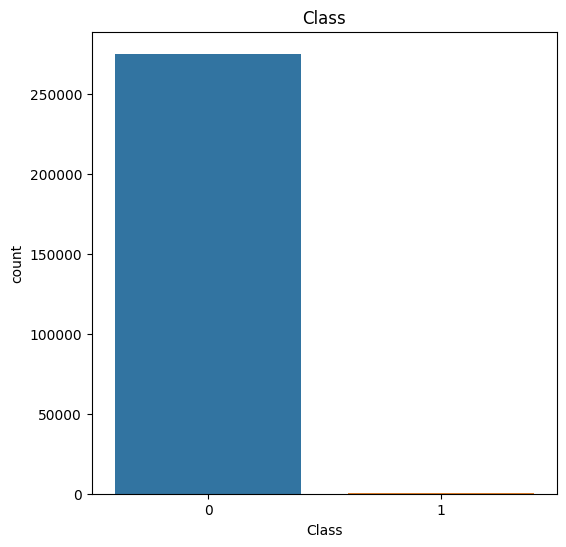

In [105]:
plt.figure(figsize=(6,6))
sns.countplot(x='Class',data=df)
plt.title('Class')
plt.show()

In [107]:
from imblearn.over_sampling import SMOTE

In [108]:
X_res,y_res = SMOTE().fit_resample(X,y)

In [109]:
y_res.value_counts()

0    275190
1    275190
Name: Class, dtype: int64

In [66]:
X = df.drop('Class',axis=1)
y = df['Class']

In [67]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.20,random_state=42)

In [68]:
log =LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [69]:
y_pred1=log.predict(X_test)

In [70]:
accuracy_score(y_test,y_pred1)

0.9440840873578255

In [71]:
precision_score(y_test,y_pred1)

0.9727469804893156

In [72]:
recall_score(y_test,y_pred1)

0.9136956166027308

In [73]:
f1_score(y_test,y_pred1)

0.9422970553217022

**DECISION TREE CLASSIFIER**

In [74]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [75]:
y_pred2=dt.predict(X_test)

In [76]:
accuracy_score(y_test,y_pred2)

0.998128565718231

In [77]:
precision_score(y_test,y_pred2)

0.9974581041087931

In [78]:
recall_score(y_test,y_pred2)

0.9988000654509754

In [79]:
f1_score(y_test,y_pred2)

0.9981286337209302

**RANDOM FOREST CLASSIFIER**

In [80]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [81]:
y_pred3=rf.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred3)

0.9999273229405138

In [83]:
precision_score(y_test,y_pred3)

0.9998545745396376

In [84]:
recall_score(y_test,y_pred3)

1.0

In [85]:
f1_score(y_test,y_pred3)

0.9999272819822931

In [86]:
final_data = pd.DataFrame({'Models':['LR','DT','RF'],'ACCURACY':[accuracy_score(y_test,y_pred1)*100,
                                                                 accuracy_score(y_test,y_pred2)*100,
                                                                 accuracy_score(y_test,y_pred3)*100]})

In [87]:
final_data

,Models,ACCURACY
0,LR,94.408409
1,DT,99.812857
2,RF,99.992732


<Axes: xlabel='Models', ylabel='ACCURACY'>

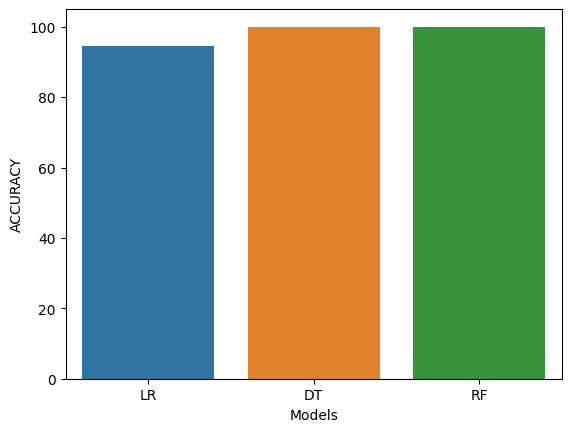

In [95]:
sns.barplot(x='Models',y='ACCURACY',data=final_data)

In [104]:
input_data = (-0.469326705,	1.111452782,	2.041002725,	1.731595163,	0.135146842,	-0.093625175,	0.26615517,	0.082988236	,0.580255403,	-0.164562675,	0.50037637,	-3.021760182,	0.92421326,	1.500793775,-0.400282644,	0.706047713,	0.115114265,	-0.046795879,	-2.548521592,	-0.358708666,	0.159387389,	0.592669569,	-0.053596184,	0.320747502,	-0.369120754,	-0.136604685,	-0.100845187,	0.039347148,	3.93				)

input_data_as_numpy_array = np.asarray(input_data)

input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

prediction = rf.predict(input_data_reshaped)
print(prediction)

[1]
